# Linear Regression Example

In [217]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import numpy as np
from sklearn.model_selection import cross_val_score

df = df.iloc[:,1:len(df)]
df = pd.read_csv('./original.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


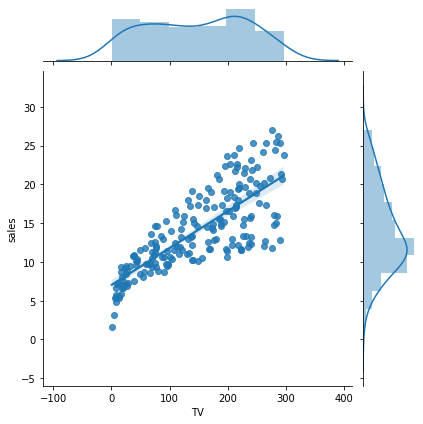

In [218]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [219]:
x = df[["TV"]]
y = df[["sales"]]

x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [220]:
reg = LinearRegression()
model = reg.fit(x,y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
#modelin nesneleri
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [222]:
#b0
model.intercept_

array([7.03259355])

In [223]:
#b1
model.coef_

array([[0.04753664]])

In [224]:
#rkare yani değişimin yüzde olarak açıklanmasıdır. veride %61 veriler açıklanabilmektedir.
model.score(x,y)

0.611875050850071

(0, 28.278798647831138)

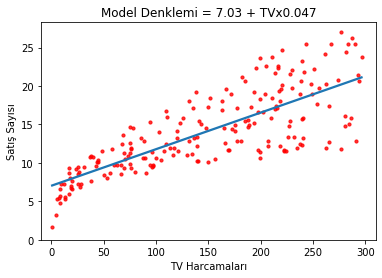

In [225]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's': 10})
g.set_title('Model Denklemi = 7.03 + TVx0.047')
g.set_xlabel("TV Harcamaları")
g.set_ylabel("Satış Sayısı")
plt.xlim(-10,310)
plt.ylim(bottom = 0)

In [226]:
#ortalama 100 TV harcaması yapılırsa sonuç tahmini aşağıdaki olur
7.03 + 100*0.047


11.73

In [227]:
model.predict([[100]])

array([[11.78625759]])

In [228]:
model.predict([[50],[100],[150]])

array([[ 9.40942557],
       [11.78625759],
       [14.16308961]])

# Multi Linear Regression Example

In [229]:
x["TV"] = df[["TV"]]
x["radio"] = df[["radio"]]
x["newspaper"] = df[["newspaper"]]

y = df[["sales"]]

/Users/hasretozkan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hasretozkan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hasretozkan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [230]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [231]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [232]:
#verilerin özeti
lm = sm.OLS(y,x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):                   2.43e-171
Time:                        23:36:16   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Tuning

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 99)

In [234]:
x_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [235]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)


In [236]:
#train hatası
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

1.7236824822650754

In [237]:
#test hatası
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

1.4312783138301641

In [243]:
#hata değerleri 20 katmanlı
errorcvs = cross_val_score(model, x_train, y_train, cv=20, scoring="neg_mean_squared_error")
errorcvs

array([ -1.1804064 ,  -2.73501635,  -2.75886441,  -2.41790566,
        -3.02244584,  -3.06247835,  -2.9777026 ,  -1.53561075,
        -5.0454658 ,  -1.99801839,  -2.86337897,  -0.94219643,
        -3.78625184,  -2.55538184,  -0.52636139,  -7.42361833,
        -2.19713793,  -1.93587803, -12.64345057,  -3.90454437])

In [245]:
np.mean(-errorcvs)

3.2756057128905582

In [246]:
np.sqrt(np.mean(-errorcvs))

1.8098634514489091